In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 15

# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [2]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [3]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/firms/'
output_dir = '../../output/'


In [4]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM
# top_p_or_num = ('num', 300)
color_list = initial_condition.COLOR_LIST



In [5]:
top_p_or_num

('p', 3)

In [6]:
df = pd.read_csv(f'{data_dir}{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.csv')
df

,app_year_period,right_person_name,reg_num,schmoch35,diversity,kci,kh_1,kh_2,kh_3,kh_4,...,kh_11,kh_12,kh_13,kh_14,kh_15,kh_16,kh_17,kh_18,kh_19,kh_20
0,1981-1990,あすか製薬株式会社,95.500,8,6,1.801,251.500,7.285,311.168,7.003,...,326.545,6.621,326.002,6.604,325.591,6.595,325.312,6.589,325.133,6.586
1,1981-1990,いすゞ自動車株式会社,1334.143,23,4,-0.089,290.750,6.503,335.176,6.482,...,325.818,6.573,325.259,6.578,325.017,6.580,324.916,6.581,324.875,6.582
2,1981-1990,しげる工業株式会社,19.167,7,7,0.015,355.571,6.138,342.657,6.398,...,325.768,6.575,325.256,6.579,325.028,6.581,324.928,6.582,324.885,6.582
3,1981-1990,ぺんてる株式会社,586.500,22,9,0.600,335.333,6.784,323.549,6.710,...,325.238,6.594,325.139,6.589,325.048,6.586,324.979,6.585,324.932,6.584
4,1981-1990,みのる産業株式会社,38.000,2,2,0.109,363.500,6.264,349.670,6.434,...,326.109,6.577,325.428,6.580,325.116,6.581,324.974,6.582,324.910,6.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7502,2001-2010,ＵＢＥ株式会社,1292.333,30,10,0.871,373.000,7.940,351.664,7.380,...,335.617,7.087,335.014,7.079,334.685,7.074,334.505,7.072,334.406,7.071
7503,2001-2010,ＵＤトラツクス株式会社,815.000,21,7,-0.205,325.000,6.407,339.143,6.761,...,334.451,7.053,334.315,7.062,334.275,7.066,334.268,7.068,334.271,7.069
7504,2001-2010,ＹＫＫ株式会社,367.083,20,2,0.105,249.500,6.401,318.208,6.835,...,334.135,7.067,334.239,7.069,334.274,7.070,334.285,7.070,334.288,7.070
7505,2001-2010,ＹＫＫＡＰ株式会社,703.167,15,1,0.383,420.000,5.721,372.259,6.574,...,335.682,7.052,334.965,7.062,334.623,7.067,334.455,7.069,334.372,7.070


1981-2010 0.166


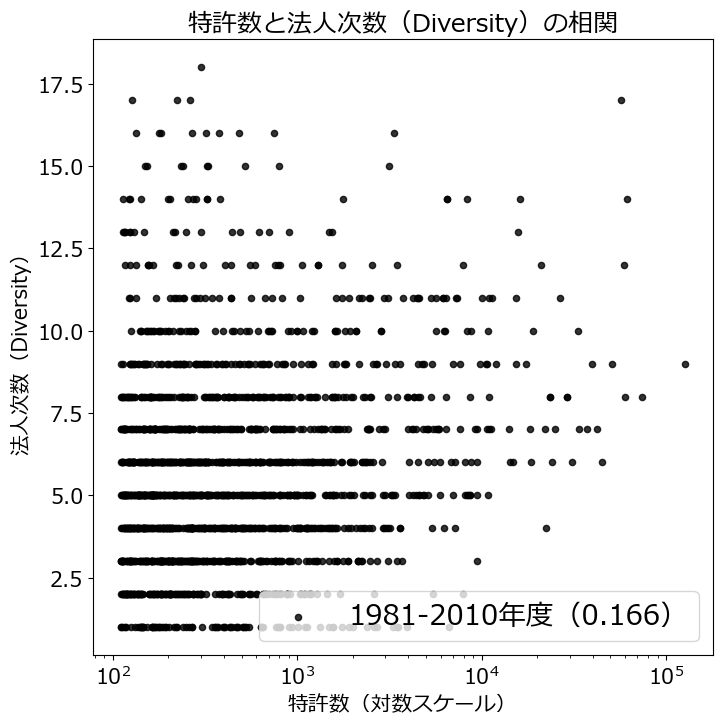

1981-2010 -0.15


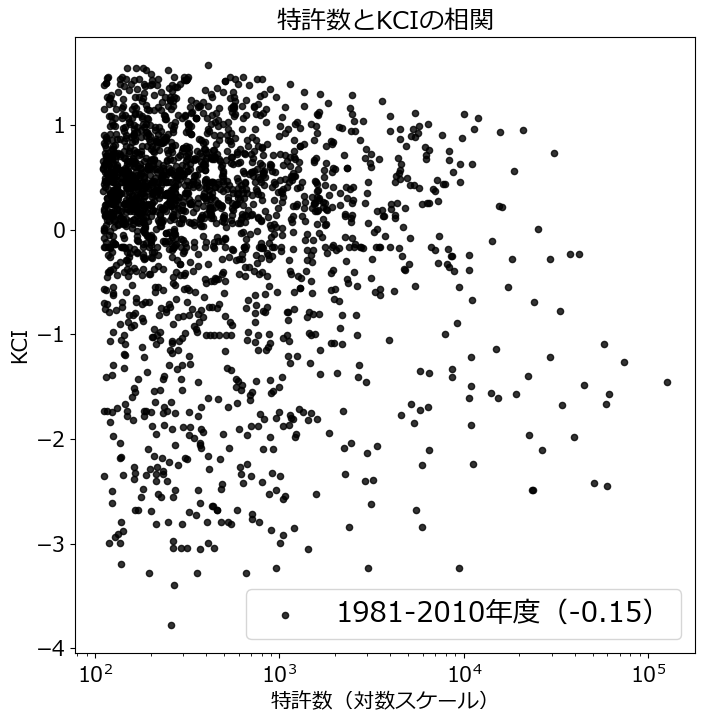

1981-2010 0.138


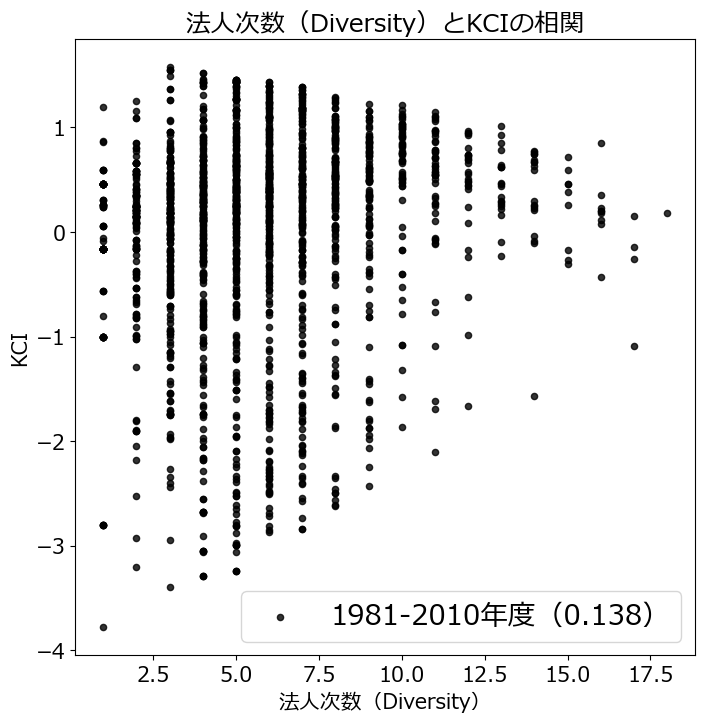

1981-2010 0.094


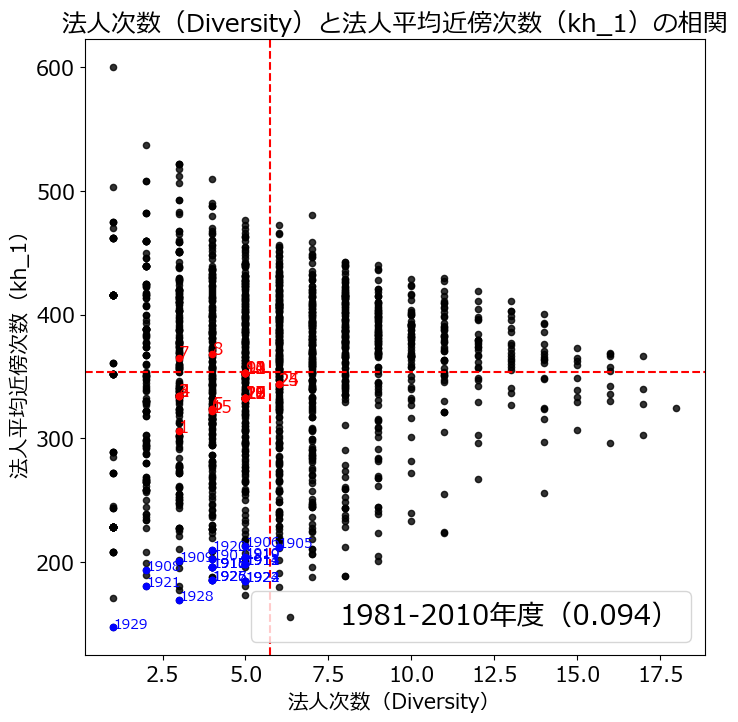

In [7]:
df_dict = {}
combi_dict = {# ind: [x, y, title, xlabel, ylabel, legend_loc]
              1: ['reg_num', 'diversity', '特許数と法人次数（Diversity）の相関', '特許数（対数スケール）', '法人次数（Diversity）', 'lower right'], 
              2: ['reg_num', 'kci', '特許数とKCIの相関', '特許数（対数スケール）', 'KCI', 'lower right'], 
              3: ['diversity', 'kci', '法人次数（Diversity）とKCIの相関', '法人次数（Diversity）', 'KCI', 'lower right'], 
              4: ['diversity', 'kh_1', '法人次数（Diversity）と法人平均近傍次数（kh_1）の相関', '法人次数（Diversity）', '法人平均近傍次数（kh_1）', 'lower right']
              }

for i, combi in combi_dict.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    period = f'{year_start}-{year_end}'
    corr_num = round(df[df[f'{ar}_{year_style}_period']==period][combi[0]].corr(df[df[f'{ar}_{year_style}_period']==period][combi[1]]), 3)
    print(period, corr_num)
    ax.scatter(df[df[f'{ar}_{year_style}_period']==period][combi[0]], 
                df[df[f'{ar}_{year_style}_period']==period][combi[1]], s=20, 
                alpha=0.8, label=f'{period}年度（{corr_num}）', color='black')
    if i == 4:
        ax.axvline(x=df[df[f'{ar}_{year_style}_period']==period][combi[0]].mean(), color='red', linestyle='--')
        ax.axhline(y=df[df[f'{ar}_{year_style}_period']==period][combi[1]].mean(), color='red', linestyle='--')
    ax.set_title(combi[2])
    if combi[0] in ['reg_num']: ax.set_xscale('log')
    if combi[1] in ['reg_num']: ax.set_yscale('log')
    x_min = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].min()
    x_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].nsmallest(2).iloc[1]
    y_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[1]].nsmallest(2).iloc[1]
    if i == 4: 
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)][combi[0]].values[0]-1,
        #         y_2smallest-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        for i, row in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).reset_index(drop=True).iterrows():
            # 2つで68分かかる
            # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[25:51,:]['right_person_name'].values:
            #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='orange')
            #     if i+1!=51: ax.scatter(row[combi[0]], row[combi[1]], s=20, color='orange')
            # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[51:76,:]['right_person_name'].values:
            #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='green')
            #     ax.scatter(row[combi[0]], row[combi[1]], s=20, color='green')
            if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).tail(25)['right_person_name'].values:
                ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=10, color='blue')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
            if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).head(25)['right_person_name'].values:
                ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='red')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='red')
        
    ax.set_ylabel(combi[4])
    ax.set_xlabel(combi[3])
    ax.legend(loc=combi[5], fontsize=20)
    plt.show()
    

In [8]:
df[df[f'{ar}_{year_style}_period']==period].sort_values('kci', ascending=False).reset_index(drop=True).head(15)

,app_year_period,right_person_name,reg_num,schmoch35,diversity,kci,kh_1,kh_2,kh_3,kh_4,...,kh_11,kh_12,kh_13,kh_14,kh_15,kh_16,kh_17,kh_18,kh_19,kh_20
0,1981-2010,株式会社ノエビア,408.833,12,3,1.572,305.667,8.214,368.911,7.892,...,360.175,7.319,358.742,7.297,357.893,7.286,357.397,7.281,357.110,7.278
1,1981-2010,ＭＳＤ株式会社,167.500,6,3,1.548,334.333,8.439,369.265,7.947,...,360.088,7.320,358.694,7.298,357.866,7.287,357.383,7.281,357.102,7.278
2,1981-2010,財団法人微生物化学研究会,181.000,7,3,1.548,334.333,8.439,369.265,7.947,...,360.088,7.320,358.694,7.298,357.866,7.287,357.383,7.281,357.102,7.278
3,1981-2010,ヴイアトリス製薬株式会社,149.167,10,3,1.548,334.333,8.439,369.265,7.947,...,360.088,7.320,358.694,7.298,357.866,7.287,357.383,7.281,357.102,7.278
4,1981-2010,クラシエフーズ株式会社,248.500,10,4,1.523,323.750,8.331,369.642,7.893,...,360.060,7.318,358.674,7.297,357.854,7.286,357.375,7.280,357.098,7.278
5,1981-2010,協和発酵バイオ株式会社,189.867,11,4,1.523,323.750,8.331,369.642,7.893,...,360.060,7.318,358.674,7.297,357.854,7.286,357.375,7.280,357.098,7.278
6,1981-2010,バイエルクロツプサイエンス株式会社,201.333,10,3,1.487,365.000,8.219,373.343,7.875,...,360.008,7.316,358.637,7.296,357.830,7.286,357.360,7.280,357.089,7.278
7,1981-2010,三井化学アグロ株式会社,269.833,8,4,1.459,368.250,8.335,372.966,7.880,...,359.935,7.316,358.596,7.296,357.806,7.286,357.347,7.280,357.082,7.277
8,1981-2010,三省製薬株式会社,140.417,6,5,1.457,353.000,8.269,372.527,7.851,...,359.943,7.315,358.600,7.295,357.808,7.285,357.348,7.280,357.082,7.277
9,1981-2010,三栄源エフ・エフ・アイ株式会社,538.000,14,5,1.457,353.000,8.269,372.527,7.851,...,359.943,7.315,358.600,7.295,357.808,7.285,357.348,7.280,357.082,7.277


In [9]:
sample_df = df[(df[f'{ar}_{year_style}_period']==f'{year_start}-{year_end}')].sort_values('kci_rank', ascending=True).copy()
sample_df_dict = {'0': sample_df.melt(id_vars=['right_person_name'], value_vars=[f'diversity']).sort_values('value', ascending=False)}
fs = (32, 40)
for i in range(2, 20+1, 2):
    sample_df_dict[f'{i}'] = sample_df.melt(id_vars=['right_person_name'], value_vars=[f'kh_{i}']).sort_values('value', ascending=False)
    # if i >= 12: display(sample_df_dict[f'{i}'].head(10))
sample = vr.rank_doubleaxis(sample_df_dict, 
            version='kci', 
                rank_num=100,
                member_col='right_person_name', 
                num_col='value',
                prop_dict={
                    'figsize': fs,
                    'xlabel': 'N',
                    'ylabel': '',
                    'title': '',
                    'fontsize': 24, 
                    'year_range': 2, 
                    'ascending': False, 
                    # 'color': color_dict
                    'color': 'default'
                })

KeyError: 'kci_rank'

1981-1990 0.183
1991-2000 0.233
2001-2010 0.174


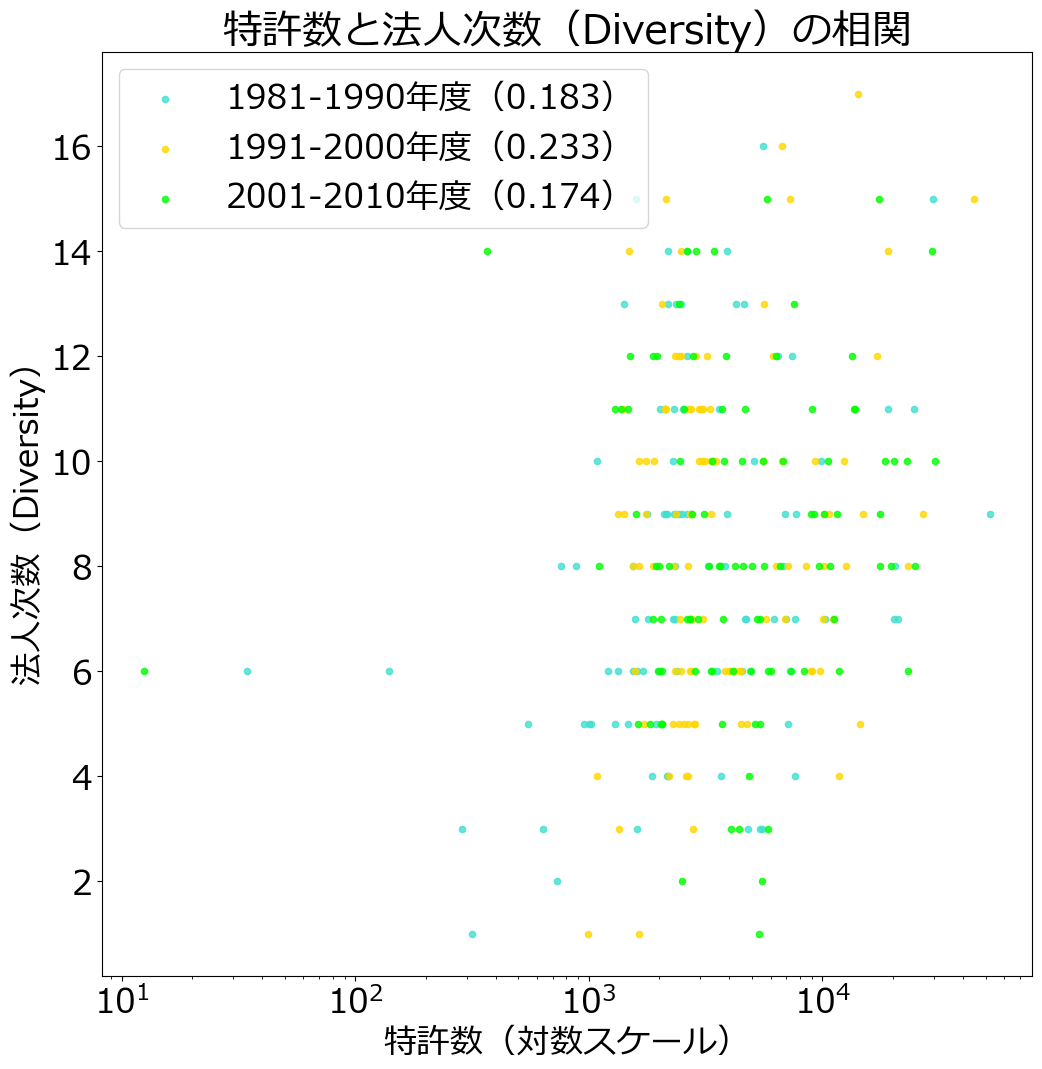

1981-1990 -0.237
1991-2000 -0.317
2001-2010 -0.297


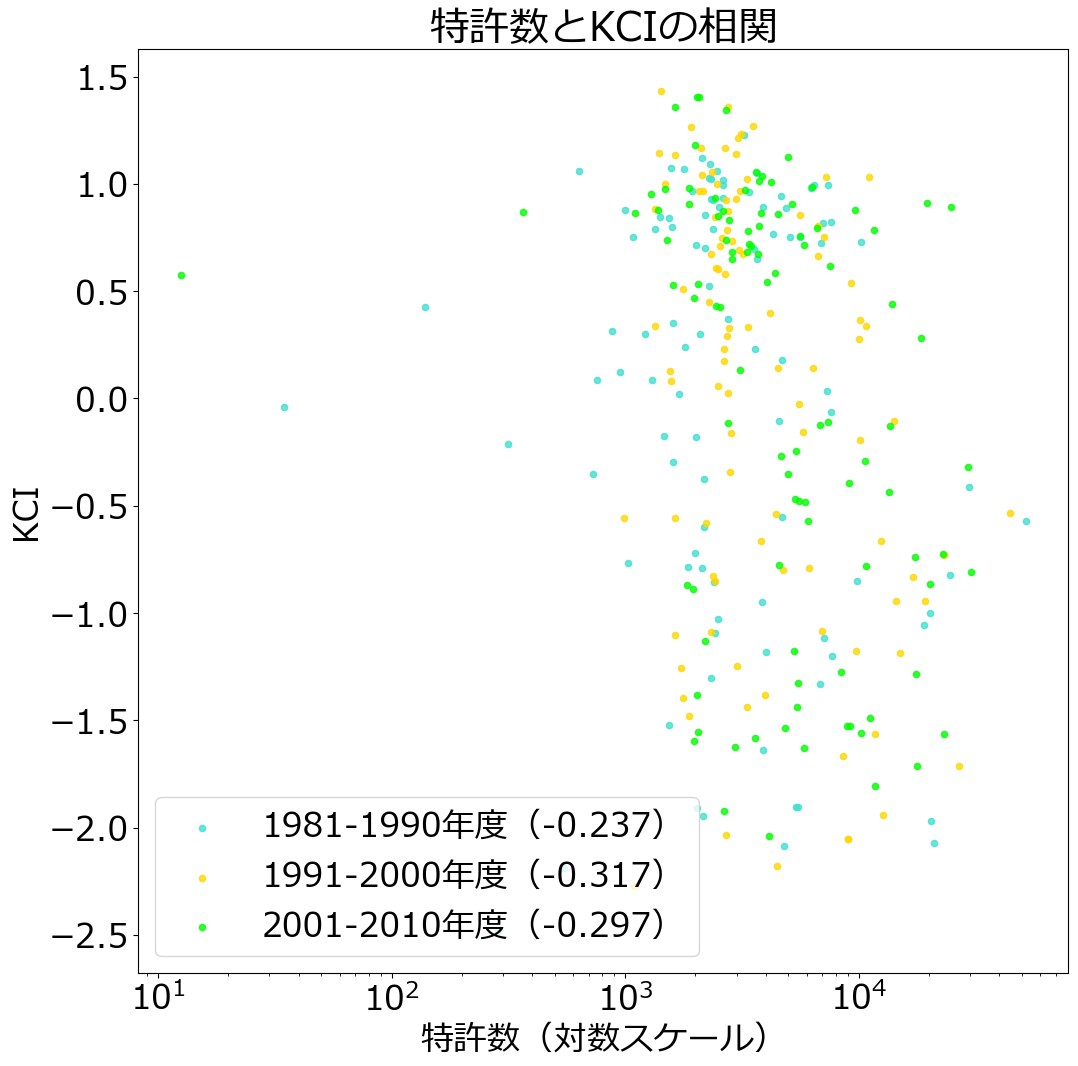

1981-1990 0.424
1991-2000 0.354
2001-2010 0.232


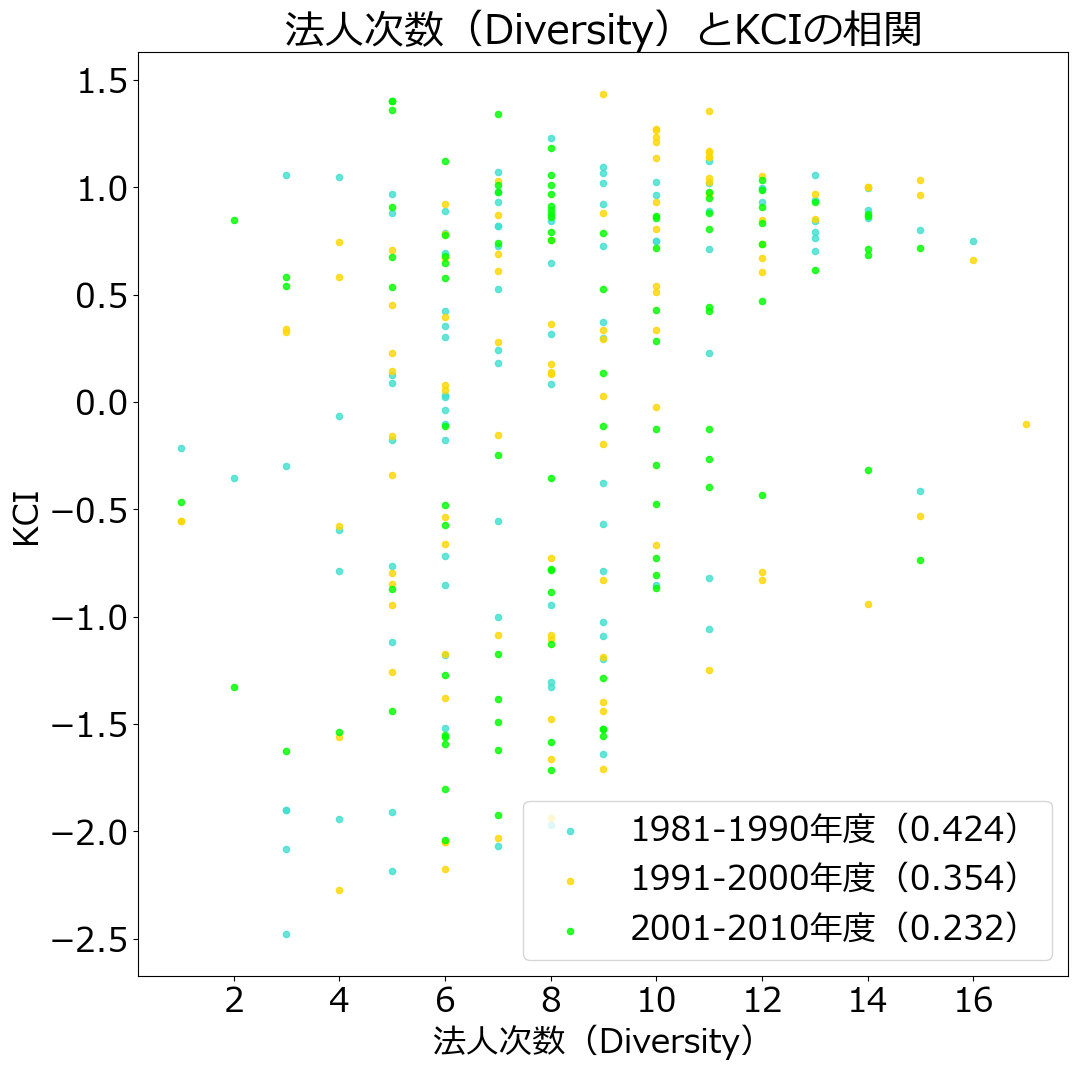

1981-1990 0.384
1991-2000 0.246
2001-2010 0.249


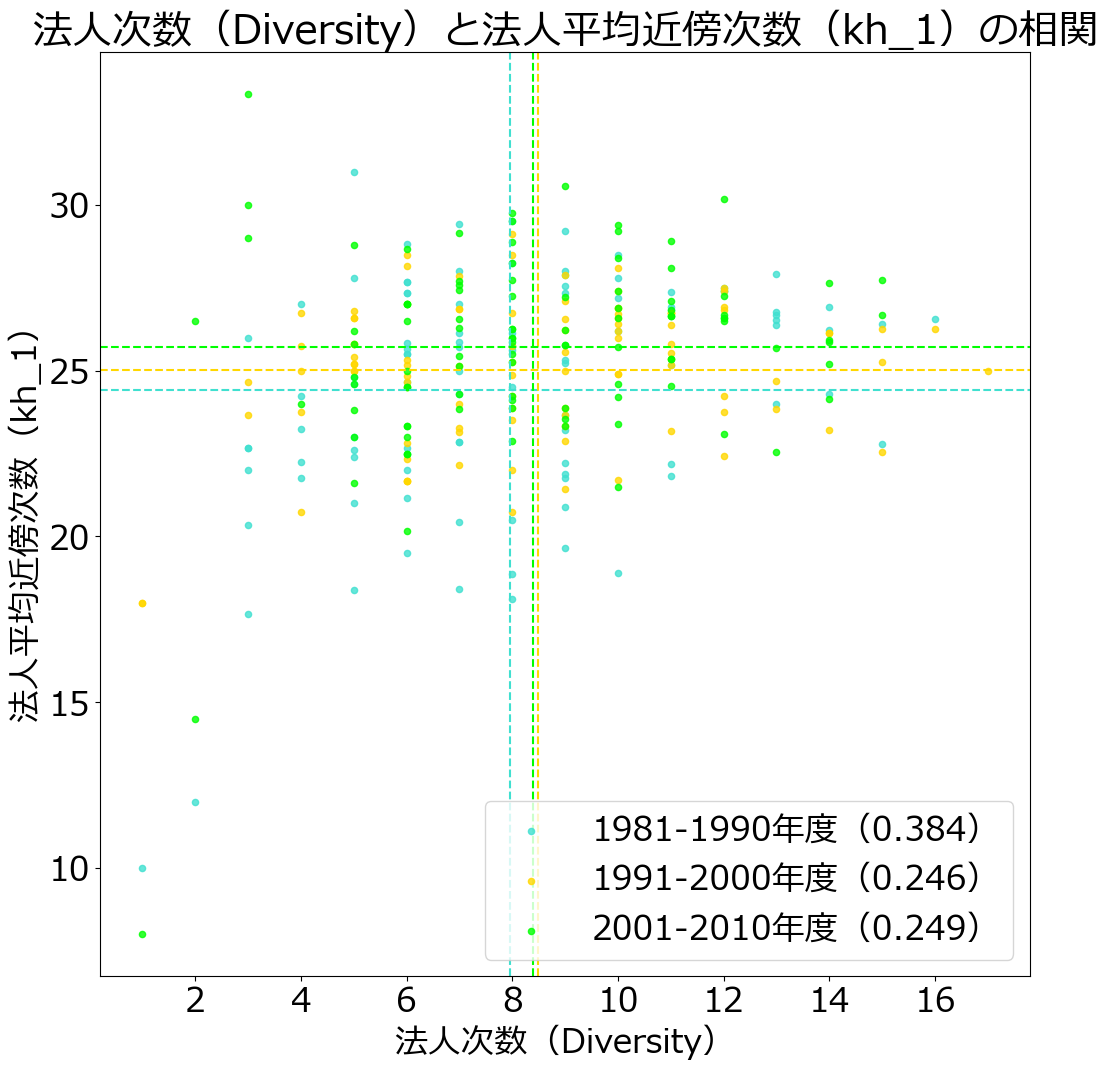

In [ ]:
df_dict = {}
combi_dict = {# ind: [x, y, title, xlabel, ylabel, legend_loc]
              1: ['reg_num', 'diversity', '特許数と法人次数（Diversity）の相関', '特許数（対数スケール）', '法人次数（Diversity）', 'upper left'], 
              2: ['reg_num', 'kci', '特許数とKCIの相関', '特許数（対数スケール）', 'KCI', 'lower left'], 
              3: ['diversity', 'kci', '法人次数（Diversity）とKCIの相関', '法人次数（Diversity）', 'KCI', 'lower right'], 
              4: ['diversity', 'kh_1', '法人次数（Diversity）と法人平均近傍次数（kh_1）の相関', '法人次数（Diversity）', '法人平均近傍次数（kh_1）', 'lower right']
              }

for i, combi in combi_dict.items():
    fig, ax = plt.subplots(figsize=(12, 12))
    color_count = 0
    for period in range(year_start, year_end+1, year_range):
        period = f'{period}-{period+year_range-1}'
        corr_num = round(df[df[f'{ar}_{year_style}_period']==period][combi[0]].corr(df[df[f'{ar}_{year_style}_period']==period][combi[1]]), 3)
        print(period, corr_num)
        ax.scatter(df[df[f'{ar}_{year_style}_period']==period][combi[0]], 
                   df[df[f'{ar}_{year_style}_period']==period][combi[1]], s=20, 
                   alpha=0.8, label=f'{period}年度（{corr_num}）', color=color_list[color_count])
        if i == 4:
            ax.axvline(x=df[df[f'{ar}_{year_style}_period']==period][combi[0]].mean(), color=color_list[color_count], linestyle='--')
            ax.axhline(y=df[df[f'{ar}_{year_style}_period']==period][combi[1]].mean(), color=color_list[color_count], linestyle='--')
        ax.set_title(combi[2])
        if combi[0] in ['reg_num']: ax.set_xscale('log')
        if combi[1] in ['reg_num']: ax.set_yscale('log')
        ax.set_ylabel(combi[4])
        ax.set_xlabel(combi[3])
        ax.legend(loc=combi[5])
        color_count += 1
    plt.show()
    

c:\Users\rin\Desktop\KCIinJapaneseFirms\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


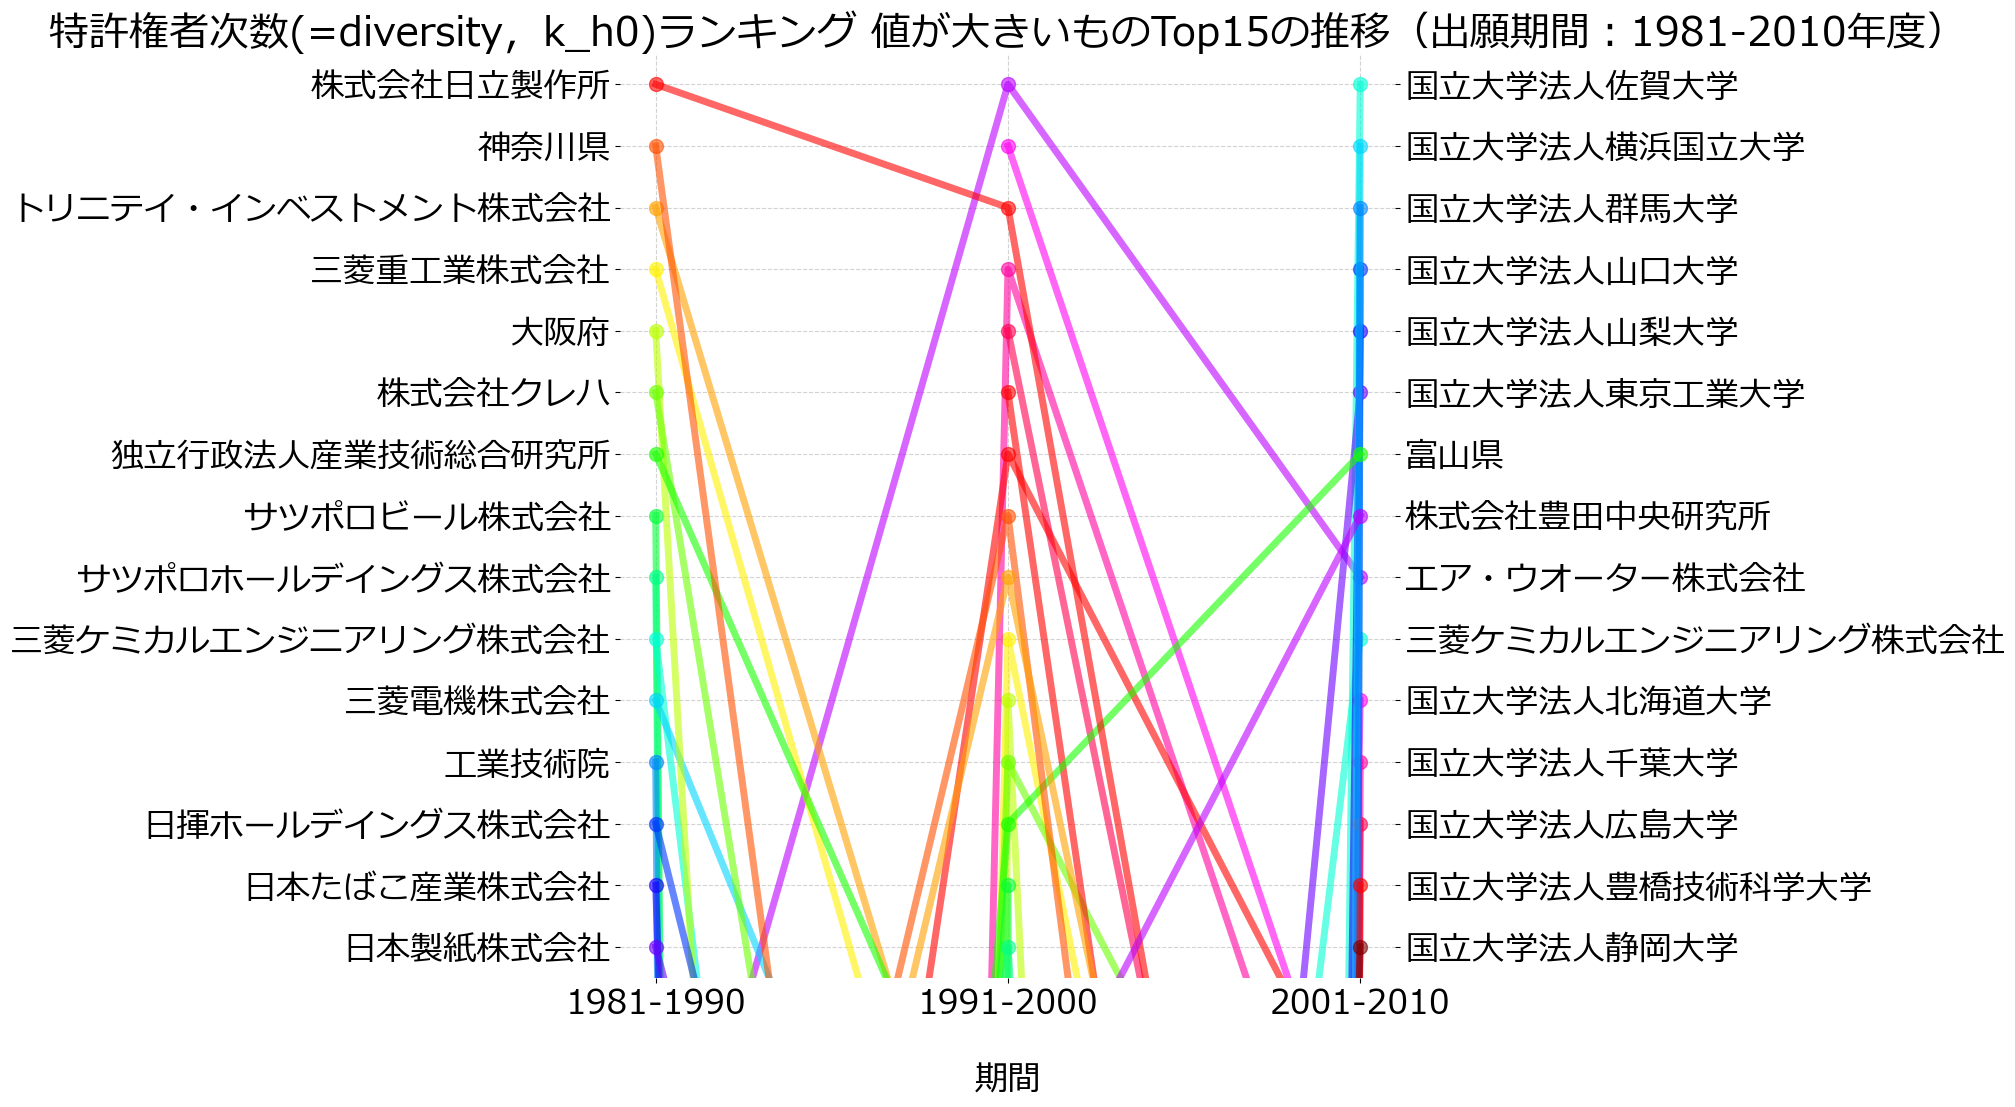

c:\Users\rin\Desktop\KCIinJapaneseFirms\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


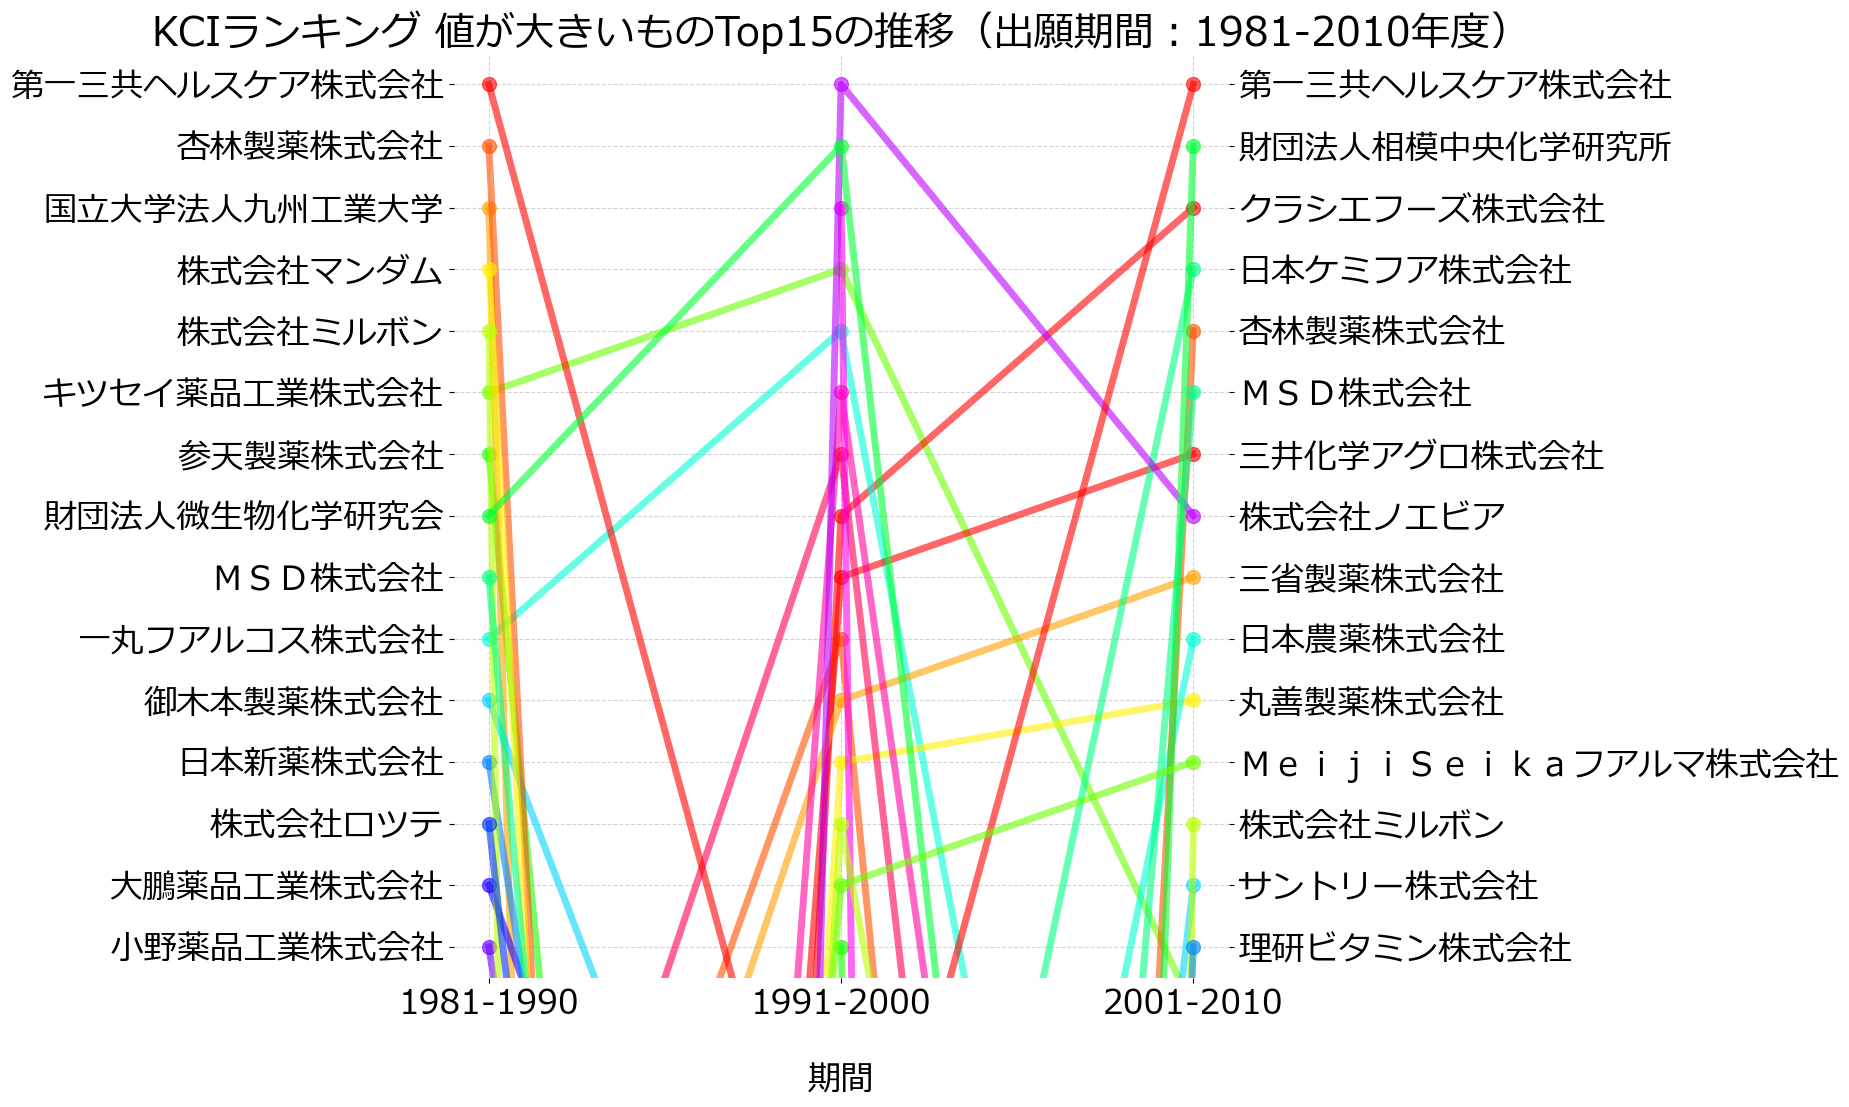

In [10]:
df_dict = {}
combi_dict = {# 1: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 1: ['right_person_name', '', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              2: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 3: ['right_person_name', 'ipc_class_num', f'IPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              4: ['right_person_name', 'kci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 5: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 8: [classification, 'tci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              }



for i, combi in combi_dict.items():
    div_df = df[[f'{ar}_{year_style}_period']+combi[:1+1]].sort_values(by=[f'{ar}_{year_style}_period', combi[1]], ascending=[True, False]).copy()
    div_df = div_df.drop_duplicates(keep='first')
    div_df_dict = {}
    for year in range(year_start, year_end+1, year_range):
        period = f'{year}-{year+year_range-1}'
        div_df_dict[period] = div_df[div_df[f'{ar}_{year_style}_period']==period].copy()
        # display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
    if i==4:
        df['kci_rank'] = df.groupby(f'{ar}_{year_style}_period')[['kci']].rank(ascending=False, method='first').reset_index(drop=False)['kci']
        # display(c_df[c_df['right_person_name'].str.contains('三菱重工業')])
    if i > 4: fs = (12, 15)
    else: fs = (10, 12)
    # display(div_df)
    sample = vr.rank_doubleaxis(div_df_dict, 
                version='kci', 
                    rank_num=15,
                    member_col=combi[0], 
                    num_col=combi[1],
                    prop_dict={
                        'figsize': fs,
                        'xlabel': '期間',
                        'ylabel': '',
                        'title': combi[2],
                        'fontsize': 24, 
                        'year_range': year_range, 
                        'ascending': combi[3], 
                        # 'color': color_dict
                        'color': 'default'
                    })
    plt.savefig(f'{output_dir}figures/{combi[1]}_{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.png', bbox_inches="tight")
    plt.show()


In [11]:
output_dir

'../../output/'

In [12]:
filtered_df = pd.read_csv('../../data/interim/internal/filtered_before_agg/addedclassification.csv', sep=',')
filtered_df

,reg_num,ipc,right_person_name,app_year,app_nendo,reg_year,reg_nendo,schmoch35
0,5684492,G10H 3/18,ＤＲＣ合同会社,2010,2010,2015,2014,34
1,5684512,B62D 57/02,株式会社ＩＨＩエアロスペース,2010,2010,2015,2014,32
2,5684598,A47C 7/62,株式会社オカムラ,2011,2010,2015,2014,33
3,5684620,H01M 4/62,三井化学株式会社,2011,2010,2015,2014,1
4,5684633,G06F 12/02,日本電信電話株式会社,2011,2011,2015,2014,6
...,...,...,...,...,...,...,...,...
5790567,1846641,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12
5790568,1846642,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12
5790569,1846643,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12
5790570,1846644,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12


In [13]:
top_p_or_num

('p', 3)

In [14]:
# filtered_df['right_person_name'].nunique()
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))]['right_person_name'].nunique()

64330

In [15]:
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))&(filtered_df['right_person_name'].isin(df['right_person_name']))]['right_person_name'].nunique()

1929

In [ ]:
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))&(filtered_df['right_person_name'].isin(df['right_person_name']))]['right_person_name'].nunique()*100 / filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))]['right_person_name'].nunique()

In [18]:
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))&(filtered_df['right_person_name'].isin(df['right_person_name']))]['reg_num'].nunique()

2875696

In [19]:
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))]['reg_num'].nunique()

3163924

In [20]:
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))&(filtered_df['right_person_name'].isin(df['right_person_name']))]['reg_num'].nunique() / filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))]['reg_num'].nunique()

0.9089017308886054

In [ ]:
1734723 / 3602904

0.4814791068538046

In [ ]:
10000 / 64330

0.155448468832582

In [ ]:
all_c_df
def ccdf(diversity_col: list):
        freq_array = np.array(np.bincount(diversity_col))
        p_list = []
        cumsum = 0.0
        s = float(freq_array.sum())
        for freq in freq_array:
            if freq != 0:
                cumsum += freq / s
                p_list.append(cumsum)
            else:
                p_list.append(1.0)
                
        ccdf_array = 1 - np.array(p_list)
        if ccdf_array[0] == 0:
            ccdf_array[0] = 1.0
        return ccdf_array

color_list = [
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
    'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
    'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
    'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
    'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
    'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
    'sienna', 'steelblue'
    ][10:]

color_count = 0
fig, ax = plt.subplots(figsize=(10, 10))
for s in all_c_df['segment'].unique():
    ccdf_array = ccdf(all_c_df[all_c_df['segment']==s]['diversity'].to_list())
    ax.plot(range(1, len(ccdf_array)+1), ccdf_array, 'o', markersize=8, 
                    color='red', label=s, alpha=0.6)
    color_count += 1
ax.legend(loc='upper right', fontsize=18)

ax.set_title('特許権者の補累積次数（Diversity）分布（両対数スケール）'+'\n', fontsize=20)
ax.set_xlabel('特許権者次数（Diversity）', fontsize=18)
ax.set_ylabel('ccdf', fontsize=18)

ax.set_xscale('log')
ax.set_yscale('log')

# x軸の指数表記を普通に戻す魔法
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))

# ax.set_xlim(prop_dict['xlim'])
# ax.set_ylim(prop_dict['ylim'])

ax.grid(axis='both', 
        which='major', 
        alpha=1, 
        linestyle='--', 
        linewidth=0.8, 
        color='gray')
    
plt.show()

In [ ]:
color_list = ['red']+[
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
    'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
    'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
    'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
    'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
    'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
    'sienna', 'steelblue'
    ][10:]
color_count = 0
fig, ax = plt.subplots(figsize=(10, 10))
for s in list(right_person_df['segment'].unique())[0:]:
    
    x = right_person_df[right_person_df['segment']==s][['reg_num']].rank(ascending=False, method='first').sort_values('reg_num', ascending=True)['reg_num']
    # y = 1 - np.cumsum(right_person_df[right_person_df['segment']==s][['reg_num']].sort_values('reg_num',ascending=False)['reg_num'] / right_person_df[right_person_df['segment']==s]['reg_num'].sum())
    y = np.cumsum(right_person_df[right_person_df['segment']==s][['reg_num']].sort_values('reg_num',ascending=False)['reg_num'] / right_person_df[right_person_df['segment']==s]['reg_num'].sum())
    # y = [1] + list(y)[:-1]
    y = list(y)[:-1] + [1]
    # ccdf_array = ccdf()
    # ax.plot(range(1, len(ccdf_array)+1), ccdf_array, 'o', markersize=8, 
    #                 color=color_list[color_count], label=s+'年度', alpha=0.6)
    ax.plot(x, y, 'o', markersize=8, 
                    color=color_list[color_count], label=s+'年度', alpha=0.6)
    ax.axvline(len(x)*3//100, color=color_list[color_count], linestyle='--')
    color_count += 1
# ax.legend(loc='lower left', fontsize=18)
ax.legend(loc='upper left', fontsize=18)

ax.set_title('各期間における特許権者の累積特許数分布（両対数スケール）'+'\n', fontsize=20)
ax.set_xlabel('特許数', fontsize=18)
ax.set_ylabel('ccdf', fontsize=18)

ax.set_xscale('log')
# ax.set_yscale('log')

ax.tick_params(labelsize=18)
# ax.set_xlim(0.8, 300)

# x軸の指数表記を普通に戻す魔法
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))

# ax.set_xlim(prop_dict['xlim'])
# ax.set_ylim(prop_dict['ylim'])

ax.grid(axis='both', 
        which='major', 
        alpha=1, 
        linestyle='--', 
        linewidth=0.6, 
        color='gray')
    
plt.show()
